In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams.update({'figure.figsize' : (20, 10)})

# Data Loading

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
df.ocean_proximity = df.ocean_proximity.str.lower()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near bay


# Goal is to create a Regression Model for Housing Pricing

In [8]:
df.median_house_value

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

# Question 1

In [9]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

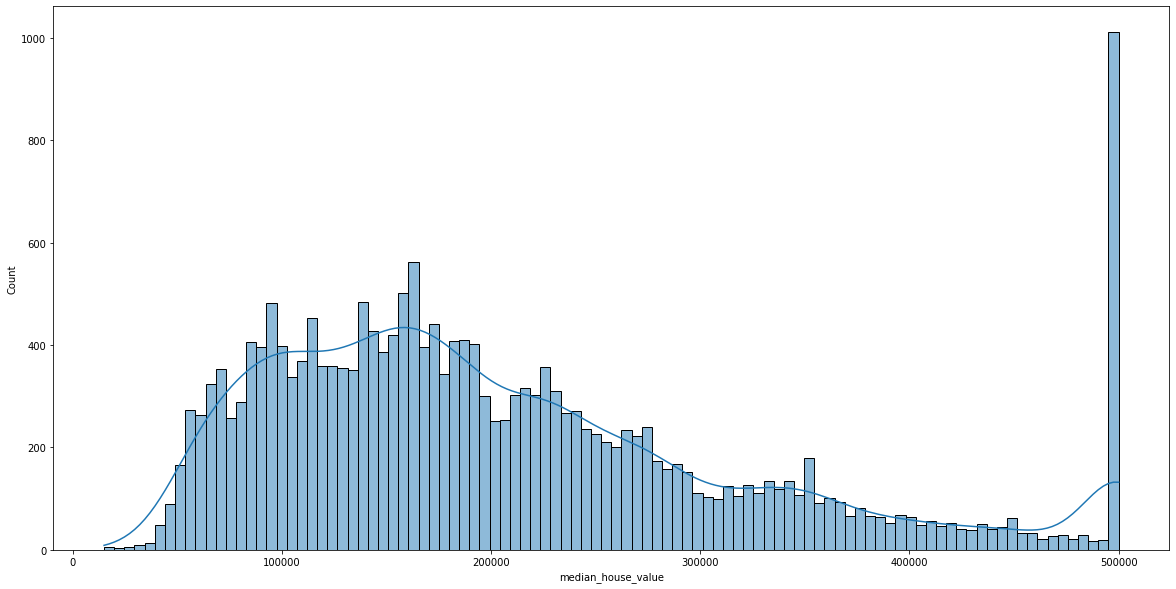

In [10]:
sns.histplot(df.median_house_value, bins=100, kde=True)
print()

In [11]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [12]:
del df['ocean_proximity']

In [13]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [14]:
df.shape

(20640, 9)

# Question 2

In [15]:
# What's the median (50% percentile) for variable 'population'?

df.population.quantile(0.5)

1166.0

In [16]:
# Splitting the data
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [17]:
n_val, n_test, n_train

(4128, 4128, 12384)

In [18]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [19]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [20]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [21]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [22]:
# Transformation

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [23]:
# Delete Column that we want to predict
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Question 3

In [24]:
# Question 3: Best way to fill NAs

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # Implementing GRAM Matrix

    XTX = X.transpose().dot(X)
    XTX_inv = np.linalg.inv(XTX)

    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [25]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

# Handling NAs

Filling NAs with 0s

In [29]:
df_train.total_bedrooms.mean()

533.4803317730147

In [41]:
def prepare_X(df):
    df = df.fillna(0)
    X = df.values
    return X

In [42]:
def rmse(y_pred, y_actual):
    sqe = (y_actual - y_pred) ** 2
    mse = sqe.mean()
    return np.sqrt(mse)

In [43]:
# Training
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = round(rmse(y_pred=y_pred, y_actual=y_val), 2)
score

0.33

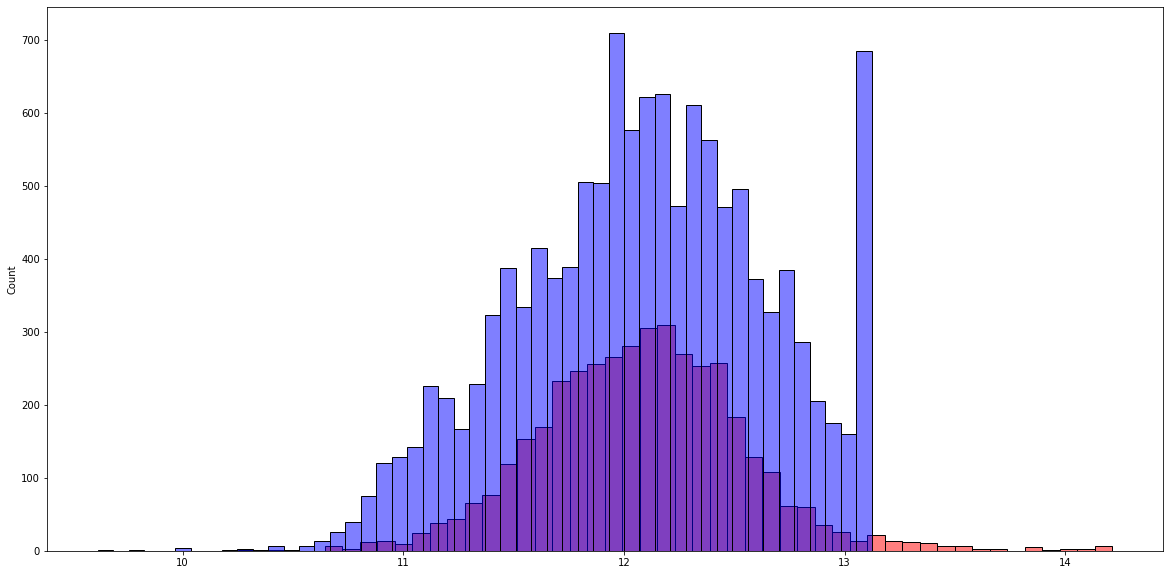

In [44]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
print()

Fill NAs with Mean

In [45]:
def prepare_X_with_mean_filling(df):
    df = df.fillna(df.total_bedrooms.mean())
    X = df.values
    return X

In [46]:
X_train = prepare_X_with_mean_filling(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation
X_val = prepare_X_with_mean_filling(df_val)
y_pred = w0 + X_val.dot(w)

score = round(rmse(y_pred=y_pred, y_actual=y_val), 2)
score

0.33

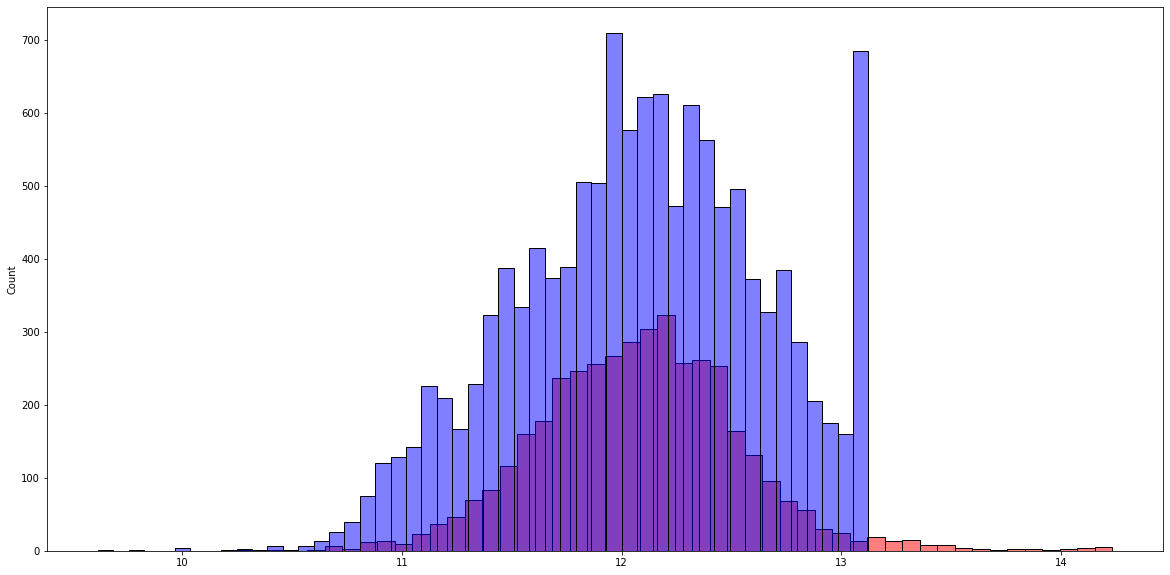

In [47]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
print()

In [48]:
def train_linear_regression_regularized(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # Implementing GRAM Matrix

    XTX = X.transpose().dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0 ])
    XTX_inv = np.linalg.inv(XTX)

    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [52]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_regularized(X_train, y_train, r=r)

    # Validation
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_pred, y_val)

    print(r, w0, round(score, 2))

0 11.562371034852093 0.57
1e-06 11.56235306162911 0.57
0.0001 11.56057396428034 0.57
0.001 11.54442543418549 0.57
0.01 11.385387819676303 0.57
0.1 10.006876138239047 0.57
1 4.527306137087667 0.57
5 1.3201561465941023 0.58
10 0.701233025068188 0.58


# Question 5

In [56]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []
for seed in seeds:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]].copy()
    df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
    df_test = df.iloc[idx[n_train+n_val:]].copy()

    df_train = df_train.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)

    y_train = df_train.median_house_value.values
    y_val = df_val.median_house_value.values
    y_test = df_test.median_house_value.values

    y_train = np.log1p(y_train)
    y_val = np.log1p(y_val)
    y_test = np.log1p(y_test)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    # Training
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    # Validation
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_pred=y_pred, y_actual=y_val)
    scores.append(score)

In [64]:
np.round(np.std(scores),3)

0.004

# Question 6

In [58]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
df_test = df.iloc[idx[n_train+n_val:]].copy()

df_full = pd.concat([df_train, df_val])

df_full = df_full.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

y_full = np.concatenate([y_train, y_val])

y_full = np.log1p(y_full)
y_test = np.log1p(y_test)

del df_full['median_house_value']
del df_test['median_house_value']

In [59]:
# Training
X_full = prepare_X(df_full)
w0, w = train_linear_regression_regularized(X_full, y_full, r=0.001)

# Validation
X_test = prepare_X(df_test)
y_pred_test = w0 + X_test.dot(w)

score = np.round(rmse(y_pred=y_pred_test, y_actual=y_test),2)

In [60]:
score

0.35